In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

In [3]:
import numpy as np
f_data = np.load('f.npy')
f_data.shape

(300, 100, 100)

In [4]:
pca.fit(f_data.reshape(300,-1))

PCA(n_components=50)

In [6]:
pca.components_.shape

(50, 10000)

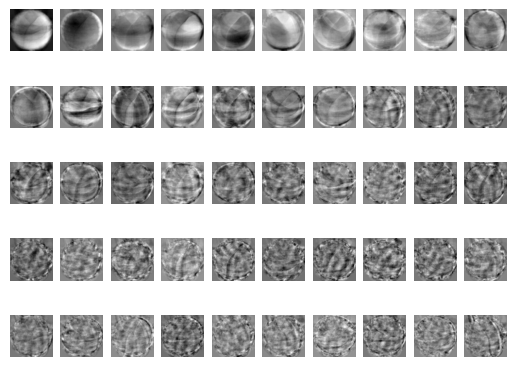

In [12]:
import matplotlib.pyplot as plt
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(pca.components_[i].reshape(100,100), cmap='gray_r')
  plt.axis('off')
plt.show()

In [14]:
f_data_pca = pca.transform(f_data.reshape(300,-1))
f_data_pca.shape

(300, 50)

복원
  - pca 축소과정에서 없어진 중요하지 않은 특성들은 복원과정에서 제거된다. -노이즈 제거


In [15]:
f_inverse =  pca.inverse_transform(f_data_pca)
f_inverse.shape

(300, 10000)

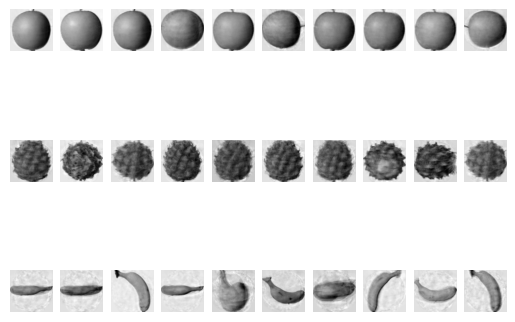

In [17]:
# 각각의 class별 이미지  10개씩 display
#0 ~9
#100 ~ 109   i:10  100
#200 ~ 209   i:20  200
for j in range(3):
  for i in range(10):
    idx = j * 100 + i
    plt.subplot(3,10,i+1 + (j*10) )
    plt.imshow(f_inverse[idx].reshape(100,100),cmap='gray_r')
    plt.axis('off')
plt.show()

적절한 주성분의 개수는 구하는 방법
  - 설명된 분산(Explained Variance)
  - 각 주성분의 고유값을 전체 고유값의 하비으로 나눈 비율을 누적해서 더한것
  - 설명된 분산이 크다는 것은 원래데이터의 변동성을 보전한다는 의미


In [20]:
np.sum(pca.explained_variance_ratio_)

0.9215753265979952

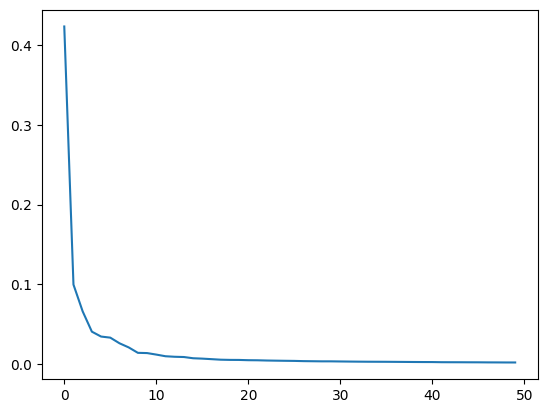

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

Kmeans : 비지도학습-클러스터 분류

LogisticRegression : 지도학습 분류

In [21]:
target = np.array([0]*100 + [1]*100 + [2]*100)

- 머신러닝 모델이 정해지면
- 데이터 나누지 말고 빠르게 평가할수 있는 방법
- cross_validate